# Data Analysis And Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV,RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
train_df = pd.read_csv('../datasets/train_clean.csv')

In [3]:
test_df = pd.read_csv('../datasets/test_clean.csv')

In [4]:
train_df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

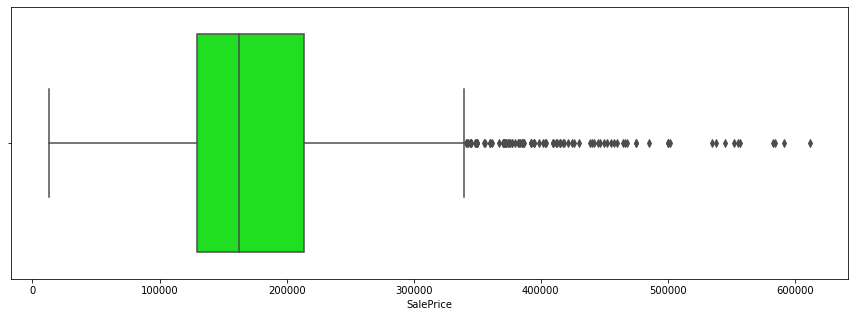

In [5]:
plt.figure(figsize = (15,5))
sns.boxplot('SalePrice', data = train_df, color ='lime');

In [6]:
# find the feature which has high correlation with SalePrice
train_corr = train_df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

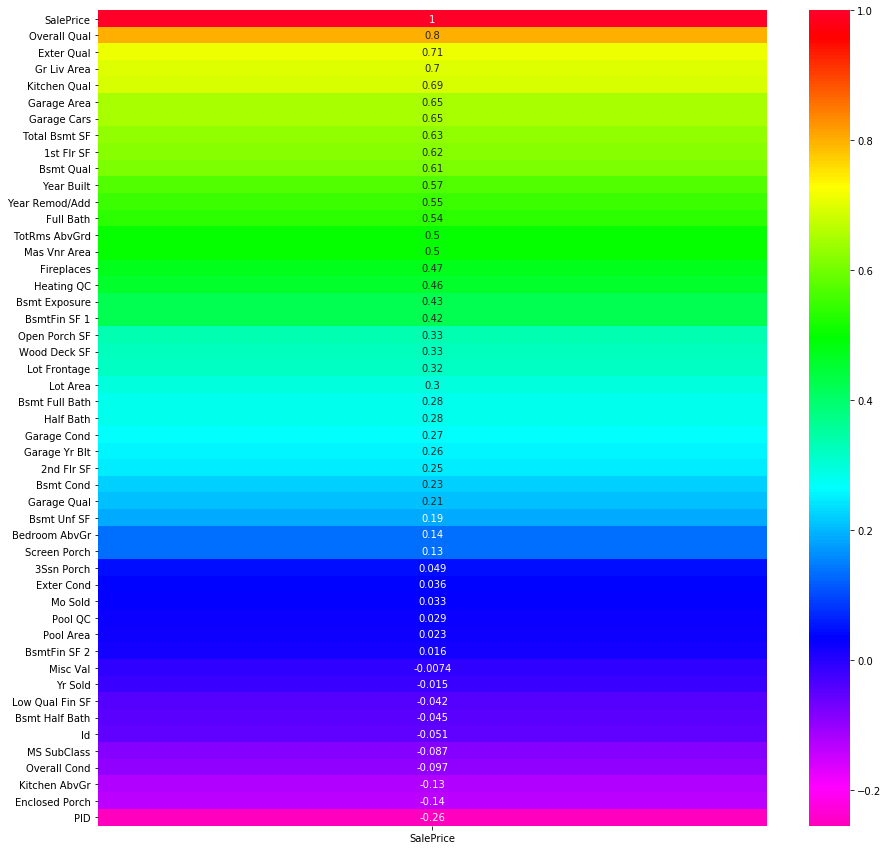

In [7]:
# Plot heatmap to visualize the correlation of each features with SalePrice
plt.figure(figsize = (15,15))
sns.heatmap(train_corr, annot= True, cmap ='gist_rainbow_r');

In [8]:
# To make sure the top 5 features have no null values in the cleaned csv file
train_df[['Overall Qual','Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area']].isnull().sum()


Overall Qual    0
Exter Qual      0
Gr Liv Area     0
Kitchen Qual    0
Garage Area     0
dtype: int64

In [9]:
train_df[['Overall Qual','Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area']].dtypes

Overall Qual      int64
Exter Qual        int64
Gr Liv Area       int64
Kitchen Qual      int64
Garage Area     float64
dtype: object

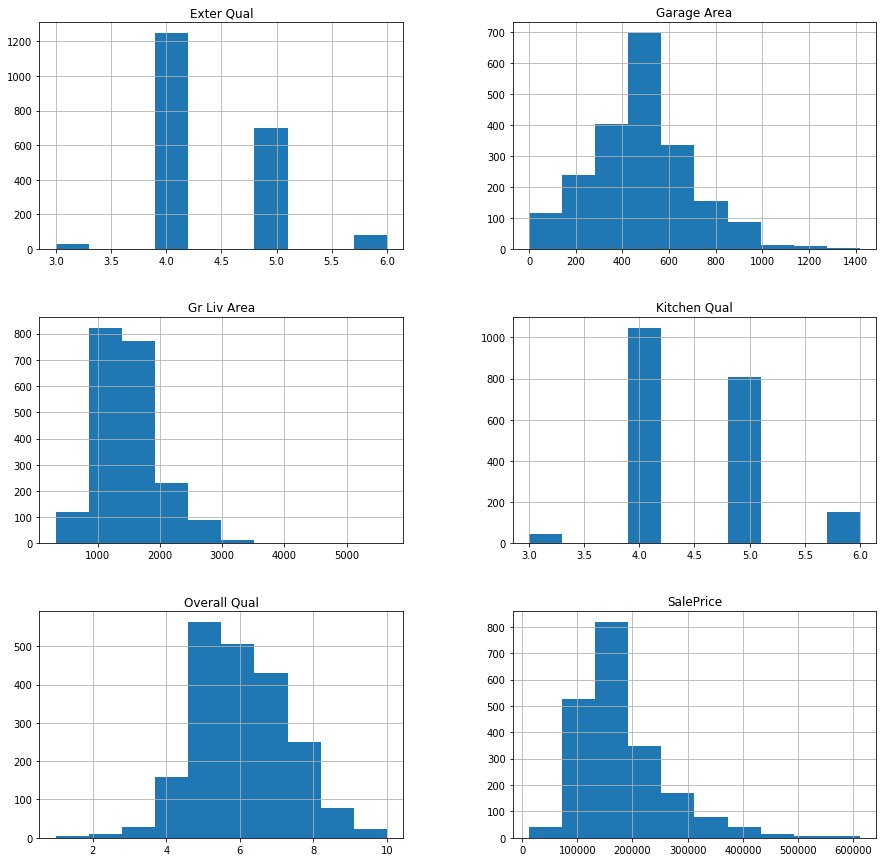

In [10]:
train_df.hist(column=['Overall Qual','Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area','SalePrice'], figsize=(15,15));

In [11]:
# Create features variable for chosen columns

features = ['Overall Qual','Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area']

#Assigning X and y

X_train = train_df[features]
y_train = train_df['SalePrice']
X_test = test_df[features]

y_train_pt = y_train.map(np.log)

In [12]:
# Scaling the data

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [13]:
# Instantiating LinearRegression, Lasso and Ridge models
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

In [14]:
# Linear Regression Model
cross_val_score(lr, X_train_sc, y_train_pt, cv=5).mean()

0.788068550849075

In [15]:
# Lasso Model
cross_val_score(lasso, X_train_sc, y_train_pt, cv=5).mean()

0.788076068103652

In [16]:
# Ridge Model
cross_val_score(ridge, X_train_sc, y_train_pt, cv=5).mean()

0.7881244235775131

In [17]:
# Since Ridge model have the best score, moving forward with Ridge model
ridge.fit(X_train_sc, y_train_pt)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [18]:
# Training Score
ridge.score(X_train_sc, y_train_pt)

0.7901215315739571

In [19]:
# Creating Predictions 

predictions = ridge.predict(X_test_sc)
pred_transform = np.exp(predictions)

pred_df = pd.DataFrame(pred_transform)

In [20]:
id_df = pd.DataFrame(test_df[['Id']])

In [21]:
df = id_df.join(pred_df)

In [22]:
df.rename(columns={0: 'SalePrice'}, inplace=True)

In [23]:
df.head()

,Id,SalePrice
0,2658,155399.488415
1,2718,157362.199350
2,2414,195806.216701
3,1989,128282.798791
4,625,153186.656672


In [24]:
# Export the df as csv for submission
df.to_csv('../datasets/submission_1.csv', index = False)